In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.utils import plot_ecg
from src.data.ptbxl_utility import get_ecg_signals_from_file

2025-04-17 16:04:06.627 | INFO     | bachelors_thesis.config:<module>:11 - PROJ_ROOT path is: C:\Users\natem\bachelors_thesis


In [12]:
# Load data
# meta = pd.read_csv('../../data/processed/ptbxl500norm/meta_val.csv')
meta = np.load('../../data/processed/ptbxl100norm/meta_val.npy', allow_pickle=True)
meta = pd.DataFrame(meta)
X = np.load('../../data/processed/ptbxl100norm/val.npy')
X = np.transpose(X, (0, 2, 1))

print(meta.shape)
print(X.shape)

(955, 28)
(955, 6, 1000)


In [13]:
meta.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,9456.0,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1984-12-12 14:12:46,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00010_lr,records500/00000/00010_hr,[NORM]
1,8295.0,41.0,0,NaN,62.0,2.0,0.0,CS-12 E,1985-03-22 15:04:54,sinusrhythmus normales ekg,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,9,records100/00000/00047_lr,records500/00000/00047_hr,[NORM]
2,16750.0,37.0,1,NaN,63.0,2.0,0.0,CS-12 E,1985-05-11 11:18:21,sinusrhythmus normales ekg,...,NaN,", I-AVR,",NaN,NaN,NaN,NaN,9,records100/00000/00051_lr,records500/00000/00051_hr,[NORM]
3,21273.0,44.0,1,NaN,68.0,2.0,0.0,CS-12 E,1985-06-26 07:13:02,sinusrhythmus qrs(t) abnormal anterolateral...,...,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00062_lr,records500/00000/00062_hr,[NORM]
4,8339.0,20.0,1,NaN,59.0,0.0,0.0,CS-12 E,1985-07-27 07:36:36,sinusbradykardie unspezifisches abnormales t,...,", III,AVF",NaN,NaN,NaN,NaN,NaN,9,records100/00000/00069_lr,records500/00000/00069_hr,[NORM]


In [19]:
# Find ECGs with baseline drift in V1
# Remove leading commas from baseline_drift column
# meta.baseline_drift = meta.baseline_drift.str.replace(',', '')
meta[18] = meta[18].str.replace(',', '')
# Remove whitespace
# meta.baseline_drift = meta.baseline_drift.str.strip()
meta[18] = meta[18].str.strip()
#meta[meta.baseline_drift == "V1"]
meta[meta[18] == "V1"]

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
75,19947.0,50.0,0,NaN,87.0,0.0,0.0,CS-12 E,1987-10-24 14:27:25,sinusrhythmus unspezifische intraventrikulÄre ...,...,V1,V1,I-AVF,NaN,NaN,NaN,9,records100/01000/01249_lr,records500/01000/01249_hr,[NORM]
307,17469.0,62.0,0,NaN,84.0,0.0,0.0,CS-12 E,1991-04-04 11:41:53,sinusrhythmus lagetyp normal normales ekg,...,V1,I-AVR,NaN,NaN,NaN,NaN,9,records100/05000/05972_lr,records500/05000/05972_hr,[NORM]
377,15009.0,32.0,1,NaN,54.0,2.0,0.0,CS-12 E,1992-01-23 09:05:22,sinusrhythmus qrs(t) abnormal,...,V1,NaN,NaN,NaN,NaN,NaN,9,records100/07000/07649_lr,records500/07000/07649_hr,[NORM]
496,16214.0,37.0,1,NaN,78.0,0.0,0.0,CS-12 E,1993-03-24 14:03:11,sinusrhythmus lagetyp normal normales ekg,...,V1,NaN,NaN,NaN,NaN,NaN,9,records100/09000/09955_lr,records500/09000/09955_hr,[NORM]
530,17168.0,41.0,0,NaN,76.0,2.0,0.0,CS-12 E,1993-07-11 11:37:08,sinusrhythmus normales ekg,...,V1,I-AVR,NaN,NaN,NaN,NaN,9,records100/10000/10483_lr,records500/10000/10483_hr,[NORM]
802,1510.0,43.0,1,165.0,70.0,11.0,1.0,AT-6 6,1996-09-28 09:17:56,sinus rhythm. normal ecg.,...,V1,NaN,NaN,NaN,NaN,NaN,9,records100/16000/16946_lr,records500/16000/16946_hr,[NORM]


In [21]:
idx = meta[meta[18] == "V1"].index[0]
signals = X[idx]

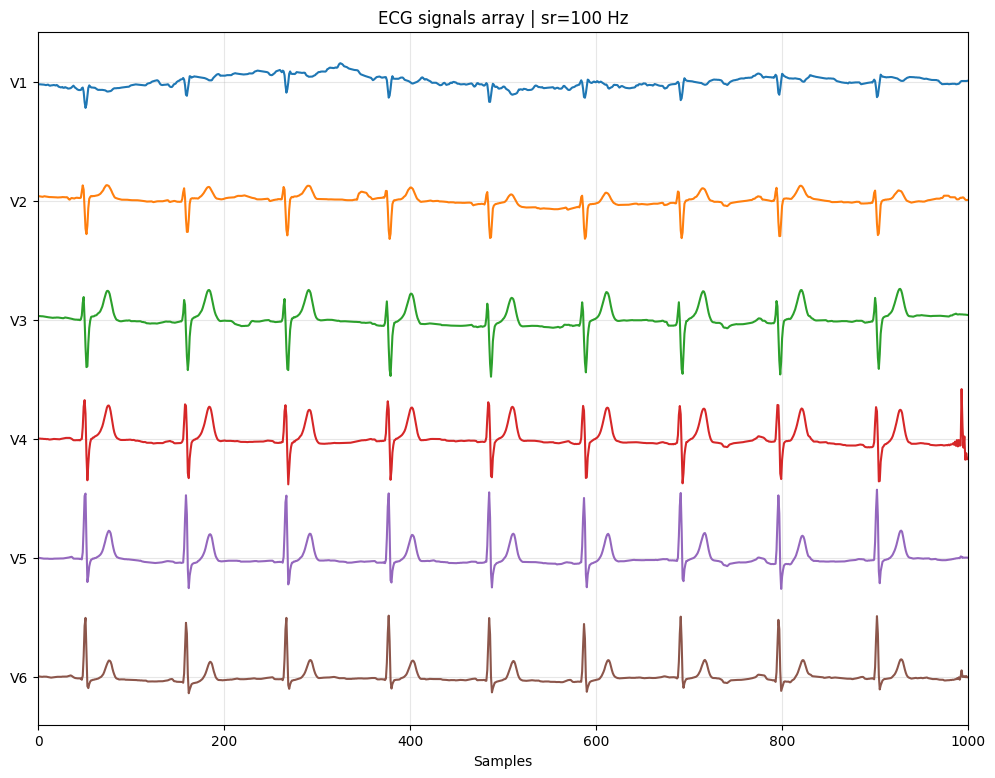

In [23]:
plot_ecg(signals, sampling_rate=100)

records100/01000/01249_lr


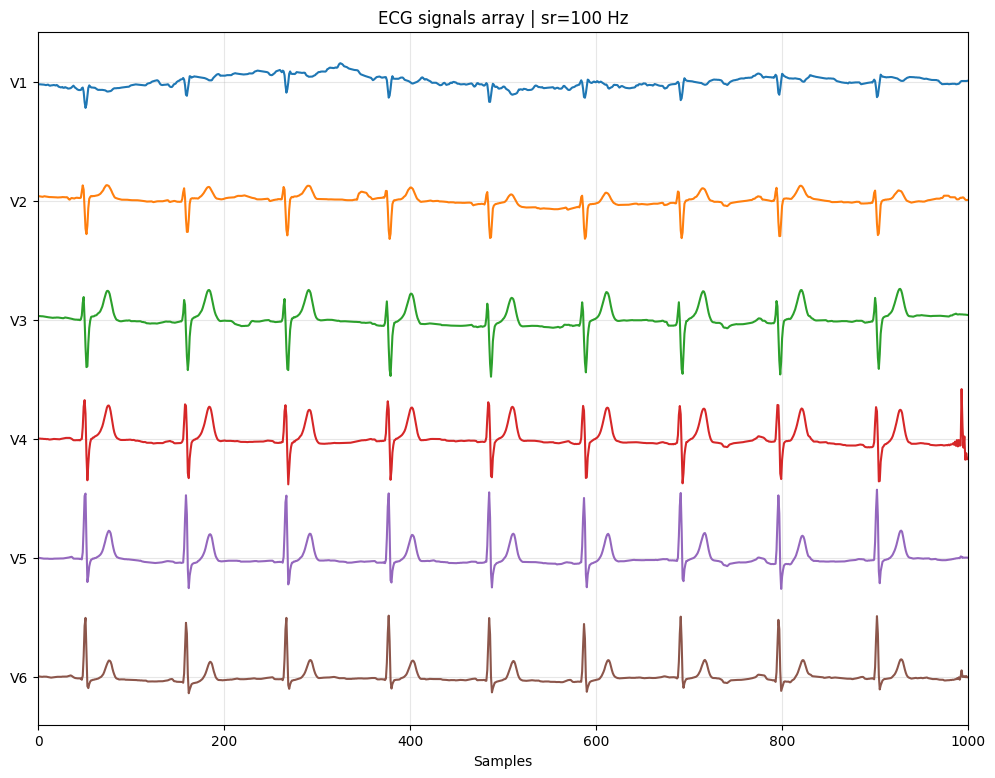

In [25]:
# Compare plot_ecg with our signals
#filename = meta.iloc[idx].filename_lr
filename = meta.iloc[idx][25]
print(filename)
reference_sigs, leads = get_ecg_signals_from_file(filename, only_precordial_leads=True)
plot_ecg(reference_sigs, leads=leads, sampling_rate=100)